<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [159]:
from tensorflow.keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [160]:
x_train.shape

(404, 13)

In [162]:
x_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [163]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

x_train = norm.fit_transform(x_train)
x_test = norm.transform(x_test)
x_train.shape

(404, 13)

In [169]:
y_train.shape

(404,)

In [175]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(),
    Dense(202, input_dim=404, activation="selu"),
    Dense(202, activation='selu'),
    Dense(1, activation='linear')
])
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['MSE'])

history = model.fit(x=x_train, 
        y=y_train, 
        epochs=10, 
        validation_data=(x_test, y_test))
          
#         callbacks=[tensorboard_callback])

Epoch 1/10
13/13 [==============================] - 0s 9ms/step - loss: 442.7971 - MSE: 442.7971 - val_loss: 296.6437 - val_MSE: 296.6437
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 177.4793 - MSE: 177.4793 - val_loss: 91.0870 - val_MSE: 91.0870
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 87.3213 - MSE: 87.3213 - val_loss: 84.0852 - val_MSE: 84.0852
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 81.9462 - MSE: 81.9462 - val_loss: 74.5633 - val_MSE: 74.5633
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 73.3610 - MSE: 73.3610 - val_loss: 71.6933 - val_MSE: 71.6933
Epoch 6/10
13/13 [==============================] - 0s 6ms/step - loss: 70.6437 - MSE: 70.6437 - val_loss: 67.9612 - val_MSE: 67.9612
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 68.1167 - MSE: 68.1167 - val_loss: 65.1339 - val_MSE: 65.1339
Epoch 8/10
13/13 [==============================] - 0s 4

In [176]:
history.history

{'loss': [442.79705810546875,
  177.4793243408203,
  87.32133483886719,
  81.94615173339844,
  73.36104583740234,
  70.64370727539062,
  68.11671447753906,
  66.1986083984375,
  64.51226806640625,
  63.878456115722656],
 'MSE': [442.79705810546875,
  177.4793243408203,
  87.32133483886719,
  81.94615173339844,
  73.36104583740234,
  70.64370727539062,
  68.11671447753906,
  66.1986083984375,
  64.51226806640625,
  63.878456115722656],
 'val_loss': [296.6437072753906,
  91.08702850341797,
  84.0851821899414,
  74.56327819824219,
  71.69329071044922,
  67.96115112304688,
  65.13386535644531,
  63.2962760925293,
  61.756805419921875,
  60.34782409667969],
 'val_MSE': [296.6437072753906,
  91.08702850341797,
  84.0851821899414,
  74.56327819824219,
  71.69329071044922,
  67.96115112304688,
  65.13386535644531,
  63.2962760925293,
  61.756805419921875,
  60.34782409667969]}

## linear regression

In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
pred = lr_model.predict(x_test)
mean_squared_error(y_test, pred)

18.16551049349646

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [125]:
##### Your Code Here #####
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [126]:
x_train.shape

(60000, 28, 28)

In [127]:
len(set(y_train))

10

In [128]:
# normalize
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [129]:
x_train.shape

(60000, 28, 28)

In [130]:
from tensorflow.keras.utils import to_categorical
# encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [131]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
result = model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0517 - accuracy: 0.6982
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5760 - accuracy: 0.8214
Epoch 3/10
1875/1875 [==============================] - 2s 963us/step - loss: 0.4858 - accuracy: 0.8389
Epoch 4/10
1875/1875 [==============================] - 2s 967us/step - loss: 0.4488 - accuracy: 0.8469
Epoch 5/10
1875/1875 [==============================] - 2s 964us/step - loss: 0.4292 - accuracy: 0.8518
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4166 - accuracy: 0.8562
Epoch 7/10
1875/1875 [==============================] - 2s 921us/step - loss: 0.4059 - accuracy: 0.8596
Epoch 8/10
1875/1875 [==============================] - 2s 932us/step - loss: 0.3986 - accuracy: 0.8609
Epoch 9/10
1875/1875 [==============================] - 2s 943us/step - loss: 0.3914 - accuracy: 0.8643
Epoch 10/10
1875/1875 [==============================] - 2s 930us/step

In [132]:
scores = model.evaluate(x_test,y_test)
print(f"{model.metrics_names[1]}: {scores[1]*100}")

313/313 [==============================] - 0s 929us/step - loss: 0.4403 - accuracy: 0.8458
accuracy: 84.579998254776


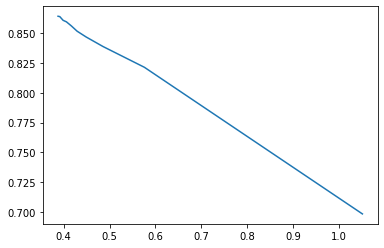

In [156]:
import seaborn as sns
sns.lineplot(result.history['loss'],result.history['accuracy'])

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.